In [1]:
import numpy as np
import pandas as pd

#### Задания для выполнения
2. Чтение excel файла и составление описательной статистики по набранному баллу

In [2]:
pandas_reader = pd.read_excel("./data/variant_1.xlsx")
score = pandas_reader["Unnamed: 9"][2:3050]

score_array = np.array(score, dtype="int")
print(score_array)
score_mean = np.mean(score_array)
print(score_mean)


[ 20  20  22 ... 100 100 100]
72.76902887139107


4. Найдите процент учащихся, выполнивших работу ниже среднего

In [15]:
count_below_average = 0
for each in score_array:
    if each < score_mean:
        count_below_average += 1

print(count_below_average)
percentage_below_average = round(count_below_average/len(score_array) * 100, 3)
print(f"{percentage_below_average}%")

1563
51.28%


5. Найти процент учащихся не сдавших экзамен

In [64]:
minimal_score = pandas_reader["Unnamed: 10"][2]

count_not_passed = 0
for each in score_array:
    if each < 36:
        count_not_passed += 1

print(count_not_passed)
percentage_not_passed = round(count_not_passed/len(score_array) * 100, 3)
print(f"{percentage_not_passed}%")

21
0.689%


6. Постройте круговую диаграмму, показывающую распределение сдавших и не сдавших экзамен

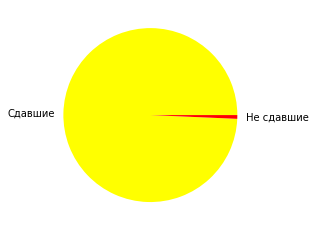

In [65]:
import matplotlib.pyplot as plt

labels = ["Сдавшие", "Не сдавшие"]
values = [100 - percentage_not_passed, percentage_not_passed]
colors = ["yellow", "red"]

plt.pie(values, labels=labels, colors=colors)
plt.show()

7. Постройте ядерную оценку плотности распределению баллов за экзамен

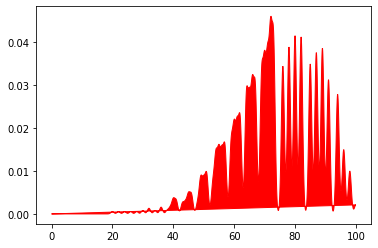

In [41]:
from sklearn.neighbors import KernelDensity

score_array_2d = score_array.reshape(-1, 1)


kde = KernelDensity(kernel="gaussian", bandwidth=0.5).fit(score_array_2d)
x_test = np.linspace(0, 100, 2000)[:, np.newaxis]
log_dens = kde.score_samples(x_test)

plt.fill(x_test, np.exp(log_dens), c="red")
plt.show()

8. Найдите процентное соотношение учащихся, сдавших экзамен на «отлично», «хорошо», «удовлетворительно», «неудовлетворительно».


- Русский язык:

- 0-35 баллов соответствуют оценке 2,
- 36-56 баллов - оценка 3,
- 57-71 баллов - оценка 4,
- 72 баллов и выше - оценка 5;

In [48]:
count_excellent = 0
count_good = 0
count_acceptable = 0
count_not_acceptable = 0

for each in score_array:
    if each >= 72:
        count_excellent += 1
    if 71 >= each >= 57:
        count_good += 1
    if 56 >= each >= 36:
        count_acceptable += 1
    if each <= 35:
        count_not_acceptable += 1

print(count_excellent, count_good, count_acceptable, count_not_acceptable)
print(count_excellent + count_good + count_acceptable + count_not_acceptable)

percentage_excellent = round(count_excellent/len(score_array) * 100, 3)
percentage_good = round(count_good/len(score_array) * 100, 3)
percentage_acceptable = round(count_acceptable/len(score_array) * 100, 3)
percentage_not_acceptable = round(count_not_acceptable/len(score_array) * 100, 3)

print(percentage_excellent, percentage_good, percentage_acceptable, percentage_not_acceptable)

1625 1050 352 21
3048
53.314 34.449 11.549 0.689


8. Какое процентное соотношение юношей и девушек писало данный экзамен?

In [22]:
gender_data = pandas_reader["Unnamed: 3"][2:3050]

count_male = 0
count_female = 0

for each in gender_data:
    if each == "М":
        count_male += 1
    if each == "Ж":
        count_female += 1

percentage_male = round(count_male / len(gender_data) * 100, 3)
percentage_female = round(count_female / len(gender_data) * 100, 3)

print(percentage_male, percentage_female)
print(percentage_male + percentage_female)

42.028 57.972
100.0


9. Сколько школ принимало участие в экзамене?

In [9]:
school_data = pandas_reader["Unnamed: 1"][2:3050]

unique_school_array = []

for each in school_data:
    if each not in unique_school_array:
        unique_school_array.append(each)

print(len(unique_school_array))

print(len(school_data.unique()))


24
24


#### Дополнительные задания

1. Сколько всего заданий с кратким ответом? С развернутым ответом?

In [97]:
import re

short_answer_data = pandas_reader["Unnamed: 5"][3049]

print(len(short_answer_data))

long_answer_data = pandas_reader["Unnamed: 6"][3049]

ans = re.findall(r"\W\d\W", long_answer_data)
print(ans)
print(len(ans))

25
['(1)', '(3)', '(1)', '(3)', '(2)', '(2)', '(3)', '(3)', '(2)', '(2)', '(1)', '(1)']
12


2. Пусть задания с кратким ответом будут задания типа В. Соответственно всего по экзамену вопросов класса В: В 1 … В к Посчитайте процент выполненных и невыполненных заданий по каждому вопросу класса В.

In [152]:
b_answer_data = pandas_reader["Unnamed: 5"][2:3050]

answers_max = {i: 0 for i in range(1, 26)}

print(len(b_answer_data))

for i in range(3048):
    answers_max[1] += 2
    for z in range(2, 7):
        answers_max[z] += 1
    #answers_max[2:7] += 1
    answers_max[7] += 5
    for z in range(8, 15):
        answers_max[z] += 1
    #answers_max[8:15] += 1
    answers_max[15] += 2
    for z in range(16, 25):
        answers_max[z] += 1
    #answers_max[16:25] += 1
    answers_max[25] += 4

print(answers_max)

answers = {i: 0 for i in range(1, 26)}
print(answers)
print(answers[25])

print(np.array(b_answer_data))

3048
{1: 6096, 2: 3048, 3: 3048, 4: 3048, 5: 3048, 6: 3048, 7: 15240, 8: 3048, 9: 3048, 10: 3048, 11: 3048, 12: 3048, 13: 3048, 14: 3048, 15: 6096, 16: 3048, 17: 3048, 18: 3048, 19: 3048, 20: 3048, 21: 3048, 22: 3048, 23: 3048, 24: 3048, 25: 12192}
{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0}
0
['1+++--1+-++---0---------0' '1+---+0--+---+0----++-+-0'
 '2-----0--+----1---------1' ... '2+++++5+++++++2+++++++++4'
 '2+++++5+++++++2+++++++++4' '2+++++5+++++++2+++++++++4']


In [153]:
for element in b_answer_data:
    for i, symbol in enumerate(element):
        if i+1 == 1 or i+1 == 7 or i+1 == 15 or i+1 == 25:
            answers[i+1] += int(symbol)
        else:
            if symbol == "+":
                answers[i+1] += 1

print(answers)


{1: 5498, 2: 2831, 3: 2662, 4: 2356, 5: 1797, 6: 2762, 7: 11672, 8: 2304, 9: 2564, 10: 2953, 11: 2840, 12: 2302, 13: 2534, 14: 2139, 15: 5304, 16: 2102, 17: 2049, 18: 2261, 19: 2114, 20: 2522, 21: 2190, 22: 1465, 23: 2333, 24: 755, 25: 9965}


In [165]:
percentage_done_answers = {i: 0 for i in range(1, 26)}

for key, value in answers.items():
    percentage_done_answers[key] = f"{round(value / answers_max[key] * 100, 3)}%"

print(percentage_done_answers) # процент выполнения каждого задания (задания с кратким ответом)

{1: '90.19%', 2: '92.881%', 3: '87.336%', 4: '77.297%', 5: '58.957%', 6: '90.617%', 7: '76.588%', 8: '75.591%', 9: '84.121%', 10: '96.883%', 11: '93.176%', 12: '75.525%', 13: '83.136%', 14: '70.177%', 15: '87.008%', 16: '68.963%', 17: '67.224%', 18: '74.18%', 19: '69.357%', 20: '82.743%', 21: '71.85%', 22: '48.064%', 23: '76.542%', 24: '24.77%', 25: '81.734%'}


3. Аналогично и с типом С (ответы с развернутым ответом)

In [198]:
detailed_answers_max = {i: 0 for i in range(1, 13)}

detailed_answer_max_points = [i for i in ans]

for i in range(len(detailed_answer_max_points)):
    detailed_answer_max_points[i] = detailed_answer_max_points[i].replace("(", "")
    detailed_answer_max_points[i] = detailed_answer_max_points[i].replace(")", "")

print(detailed_answer_max_points)

detailed_answers_data = pandas_reader["Unnamed: 6"][2:3050]


for i in range(3048):
    for z in range(12):
        detailed_answers_max[z+1] += int(detailed_answer_max_points[z])



print(detailed_answers_max)



detailed_answers_array = []


for each in detailed_answers_data:
    detailed_answers_array.append(re.sub(r"\W\d\W", "", each))



print(detailed_answers_array[-10:])

['1', '3', '1', '3', '2', '2', '3', '3', '2', '2', '1', '1']
{1: 3048, 2: 9144, 3: 3048, 4: 9144, 5: 6096, 6: 6096, 7: 9144, 8: 9144, 9: 6096, 10: 6096, 11: 3048, 12: 3048}
['131322332211', '131322332211', '131322332211', '131322332211', '131322332211', '131322332211', '131322332211', '131322332211', '131322332211', '131322332211']


In [199]:
detailed_answers = {i: 0 for i in range(1, 13)}

for each in detailed_answers_array:
    for i, score in enumerate(each):
        detailed_answers[i+1] += int(score)

print(detailed_answers)


{1: 2949, 2: 6823, 3: 2879, 4: 7288, 5: 4991, 6: 3753, 7: 6509, 8: 5069, 9: 3543, 10: 3170, 11: 2987, 12: 2577}


In [200]:
percentage_done_detailed_answers = {i: 0 for i in range(1, 13)}

for key, value in detailed_answers.items():
    percentage_done_detailed_answers[key] = f"{round(value / detailed_answers_max[key] * 100, 3)}%"

print(percentage_done_detailed_answers)

{1: '96.752%', 2: '74.617%', 3: '94.455%', 4: '79.703%', 5: '81.873%', 6: '61.565%', 7: '71.183%', 8: '55.435%', 9: '58.12%', 10: '52.001%', 11: '97.999%', 12: '84.547%'}


4. Сделайте анализ по двум школам:
    i. по всем выполненным заданиям типа В
    ii. по заданиям типа С больше 50%
    iii. по среднему баллу юношей и девушек

Для выполнения задания будем использовать данные по школам 148 и 152

In [3]:
#print(score)
#print(school_data)
#print(gender_data)

school_148_male_score = []
school_148_female_score = []

school_152_male_score = []
school_152_female_score = []

for i in range(2, len(score)):
    if school_data[i] == 148:
        if gender_data[i] == "М":
           school_148_male_score.append(score[i])
        if gender_data[i] == "Ж":
            school_148_female_score.append(score[i])
    if school_data[i] == 152:
        if gender_data[i] == "М":
            school_152_male_score.append(score[i])
        if gender_data[i] == "Ж":
            school_152_female_score.append(score[i])


#print(school_148_male_score, school_148_female_score, school_152_male_score, school_152_female_score)
print(np.mean(school_148_male_score))
print(np.mean(school_148_female_score))

print(np.mean(school_152_male_score))
print(np.mean(school_152_female_score))

NameError: name 'school_data' is not defined